In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/processed.csv",index_col=0)

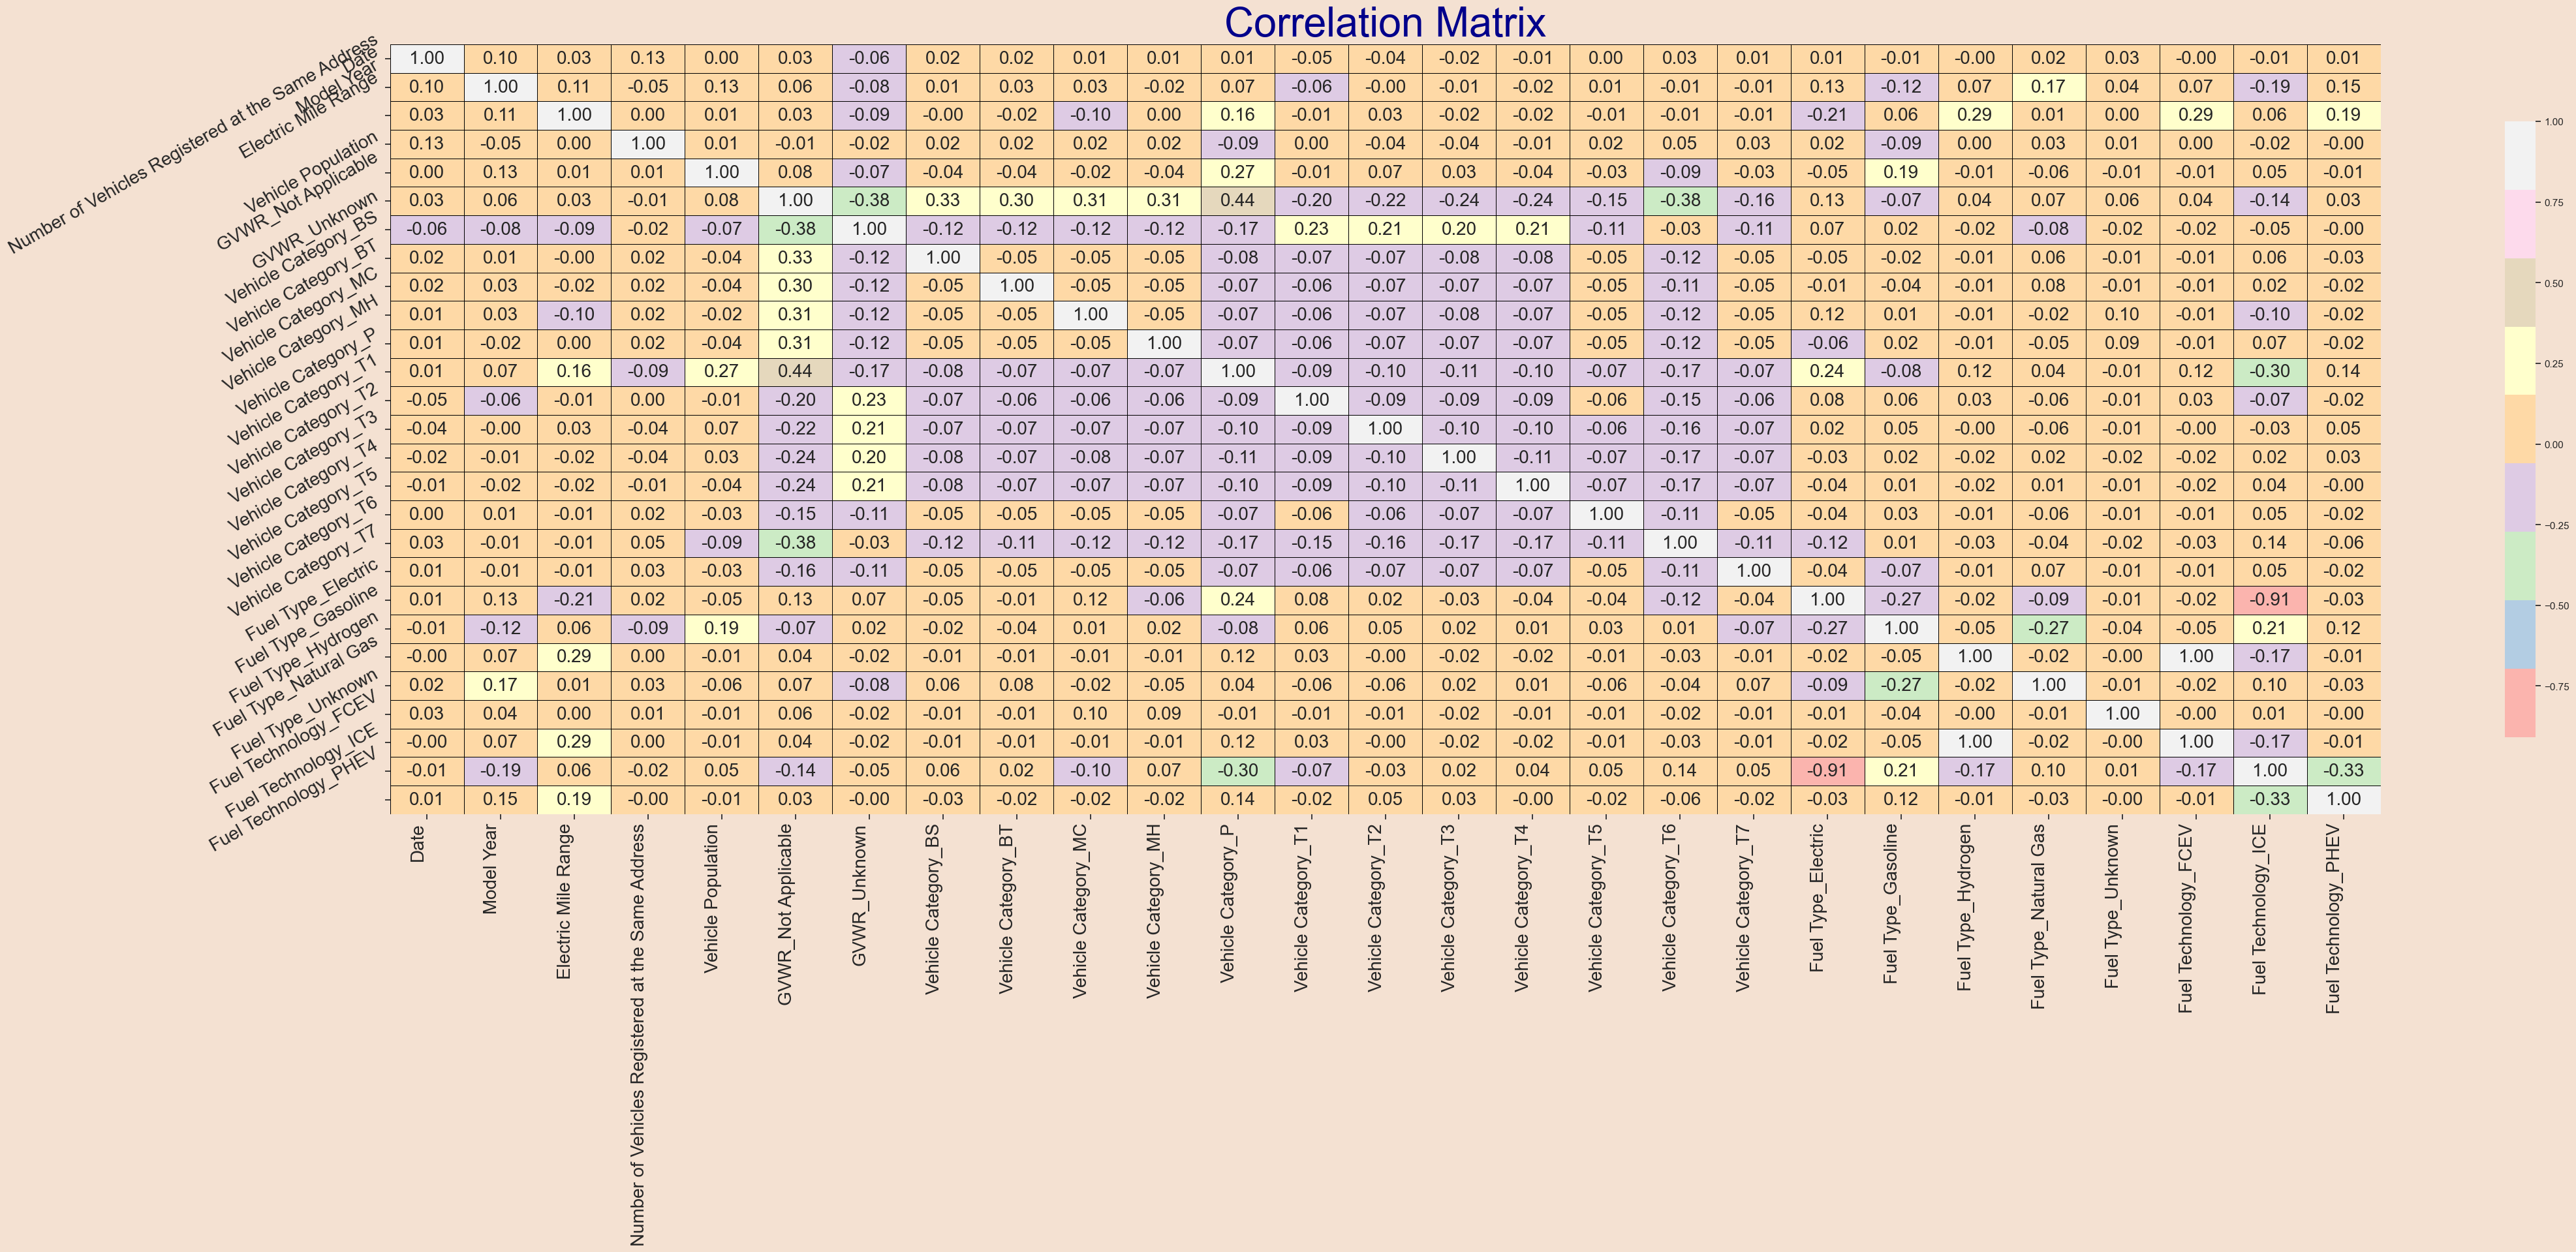

In [20]:
# Compute the correlation matrix
corr = df.corr()

# Set a clean, minimalistic style
sns.set(style="ticks")

# Create a figure with larger size for better readability
plt.figure(figsize=(45, 20))

# Plot the heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Pastel1', linewidths=0.5, linecolor='black', 
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 20})

# Add title and labels with adjusted font size
plt.title("Correlation Matrix", fontsize=45, color='darkblue', weight='normal')

# Rotate x and y axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(rotation=30, ha='right', fontsize=20)

# Change background color to light beige
plt.gcf().set_facecolor('#f4e1d2')  # Light brown color
plt.gca().set_facecolor('#f4e1d2')  # Light brown color for the plot area

# Increase spacing between labels to prevent overlap
plt.tight_layout(pad=3)

# Save the plot as a PNG image
plt.savefig("correlation_matrix_brown.png", dpi=300)

# Show the plot
plt.show()

In [4]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [5]:
X = df.drop(['Vehicle Population'],axis=1)

In [6]:
y = df['Vehicle Population']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Evaluate
y_pred = model.predict(X_test)
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")

RMSE: 3630.3839312834357
R²: 0.9618894428320326


In [10]:
feature_importances = model.feature_importances_
feature_names = X_train.columns

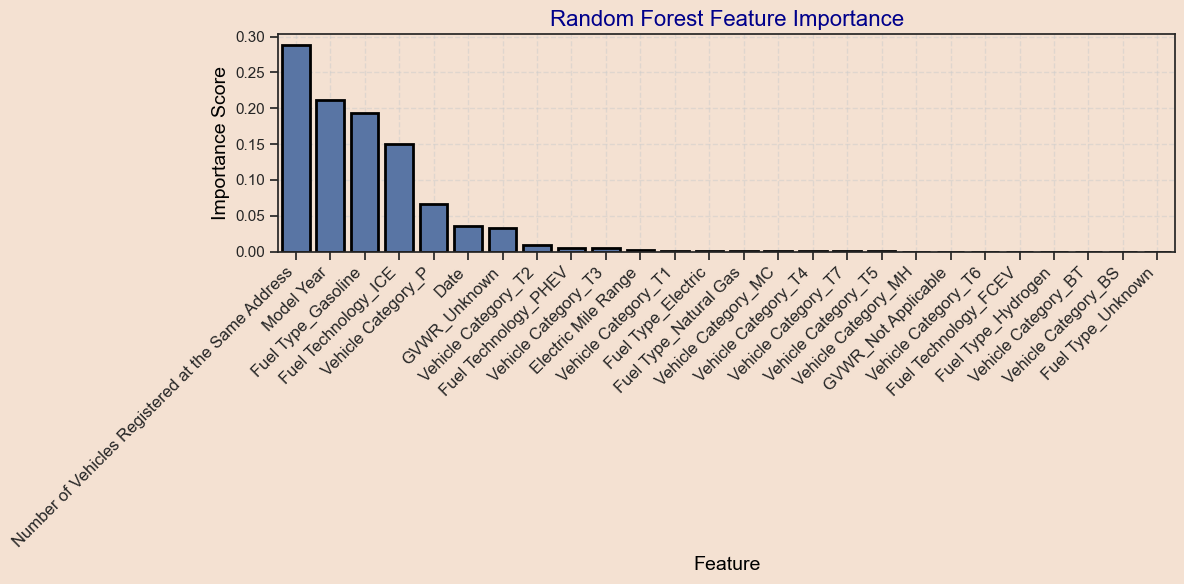

In [11]:
# Assuming 'feature_names' and 'feature_importances' are already defined
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set a clean, minimalistic style
sns.set(style="ticks")

# Create a figure with larger size for better readability
plt.figure(figsize=(12, 6))

# Plot the feature importance bar chart
sns.barplot(x='Feature', y='Importance', data=importance_df, edgecolor="black", linewidth=2)

# Change the background color to light beige
plt.gcf().set_facecolor('#f4e1d2')  # Light brown color
plt.gca().set_facecolor('#f4e1d2')  # Light brown color for the plot area

# Refined plot title and labels
plt.title("Random Forest Feature Importance", fontsize=16, color='darkblue', weight='normal')
plt.xlabel("Feature", fontsize=14, color='black', weight='normal')
plt.ylabel("Importance Score", fontsize=14, color='black', weight='normal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Customize the grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout for a clean finish
plt.tight_layout()

# Show the plot
plt.show()

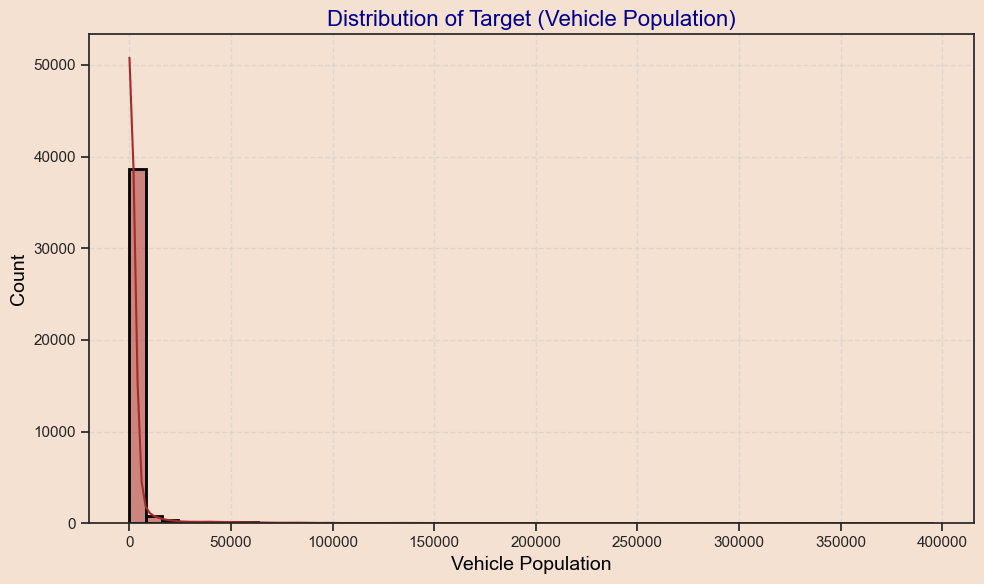

In [12]:
# Assuming 'y' is the target variable (Vehicle Population)
plt.figure(figsize=(10, 6))  # Larger figure for better readability

# Plot the histogram with KDE
sns.histplot(y, bins=50, kde=True, color='brown', edgecolor="black", linewidth=2)

# Set the background color to light beige
plt.gcf().set_facecolor('#f4e1d2')  # Light brown color
plt.gca().set_facecolor('#f4e1d2')  # Light brown color for the plot area

# Refined plot title and labels
plt.title("Distribution of Target (Vehicle Population)", fontsize=16, color='darkblue', weight='normal')
plt.xlabel("Vehicle Population", fontsize=14, color='black', weight='normal')
plt.ylabel("Count", fontsize=14, color='black', weight='normal')

# Customize the grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout for a clean finish
plt.tight_layout()

# Show the plot
plt.show()


The target variable is right skewed and training over skewed targets may not yield proper results. Hence scaling them can spread their distributions to refine better predictions

In [13]:
y = np.log1p(y)

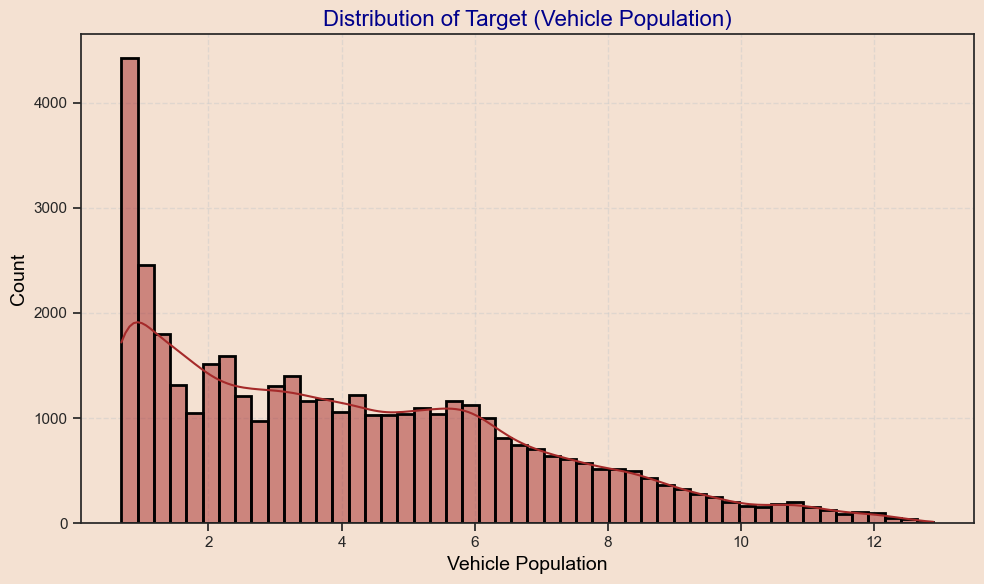

In [14]:
# Assuming 'y' is the target variable (Vehicle Population)
plt.figure(figsize=(10, 6))  # Larger figure for better readability

# Plot the histogram with KDE
sns.histplot(y, bins=50, kde=True, color='brown', edgecolor="black", linewidth=2)

# Set the background color to light beige
plt.gcf().set_facecolor('#f4e1d2')  # Light brown color
plt.gca().set_facecolor('#f4e1d2')  # Light brown color for the plot area

# Refined plot title and labels
plt.title("Distribution of Target (Vehicle Population)", fontsize=16, color='darkblue', weight='normal')
plt.xlabel("Vehicle Population", fontsize=14, color='black', weight='normal')
plt.ylabel("Count", fontsize=14, color='black', weight='normal')

# Customize the grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout for a clean finish
plt.tight_layout()

# Show the plot
plt.show()